In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Here, we have to create a model for churn ratio. 
# Which factor depends on the churn

In [5]:
# Target Variable
y=df["Exited"]

In [6]:
# Removing Gender & Geography for now to do one hot encoding 
X=df.drop(['Exited','RowNumber','CustomerId','Surname','Gender','Geography'],axis=1)

In [7]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [8]:
# Now, Geography nd Gender are categorical variable, so do one hot encoding 
geo=df['Geography']

In [9]:
# We have to remove one column for preventing dummy variable trap. 
geo = pd.get_dummies(geo,drop_first=True)

In [10]:
# One Hot Encoding --> Gender variable
gen=df["Gender"]
gen = pd.get_dummies(gen,drop_first=True)

In [11]:
gen

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
# Now concatenating gender, geography and x
X_final=pd.concat([X,gen,geo],axis=1)

In [13]:
X_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [14]:
# Now split data into training and testing 
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X_final,y,test_size=0.2,random_state=96)

In [15]:
X_train.shape

(8000, 11)

In [16]:
# Building Keras model 
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Adding 1st layer with 8 neurons
# We have 11 features to be provided so input_dim=11
model=Sequential()
model.add(Dense(units=8, input_dim=11, activation="relu", kernel_initializer="zeros", bias_initializer="zeros"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.get_layer("dense").get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [20]:
# Adding 2nd layer 
model.add(Dense(units=8, activation="relu"))

In [21]:
# Add final layer with sigmoid function as output can be 1 or 0
model.add(Dense(units=1,activation="sigmoid"))

In [22]:
from keras.optimizers import Adam
opt=Adam(learning_rate=0.0000000005)
model.compile(optimizer="adam",loss="binary_crossentropy")

In [23]:
# Just by adding Learning Rate, we can see sudden change in loss. 
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 35s 3ms/step - loss: 0.6762
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6189
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5791
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5531
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5325
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5139
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5130
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5010
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5089
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4939
Epoch 11/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4979
Epoch 12/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5092
Epoch 13/100

250/250 [==============================] - 1s 3ms/step - loss: 0.4856
Epoch 100/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5088


In [24]:
# History shows entire loss
model.history.history

{'loss': [0.6606464385986328,
  0.6069585680961609,
  0.5690436363220215,
  0.5431583523750305,
  0.5260711908340454,
  0.5151845812797546,
  0.5083867907524109,
  0.5043462514877319,
  0.5020348429679871,
  0.5007903575897217,
  0.5001435279846191,
  0.4998033940792084,
  0.499660849571228,
  0.4995936453342438,
  0.4995768070220947,
  0.4995652735233307,
  0.49956509470939636,
  0.4995720684528351,
  0.4995677173137665,
  0.49957484006881714,
  0.4995749890804291,
  0.4995582103729248,
  0.4995690882205963,
  0.49957069754600525,
  0.49956318736076355,
  0.4995615482330322,
  0.49955955147743225,
  0.4995560646057129,
  0.49955716729164124,
  0.4995618760585785,
  0.4995534420013428,
  0.49956515431404114,
  0.4995660185813904,
  0.4995816946029663,
  0.49957510828971863,
  0.49956512451171875,
  0.49957263469696045,
  0.4995647370815277,
  0.49955499172210693,
  0.49955734610557556,
  0.49956488609313965,
  0.49956491589546204,
  0.499555379152298,
  0.4995601177215576,
  0.49957549

In [25]:
# We can plot this in a graph for better visualization 
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

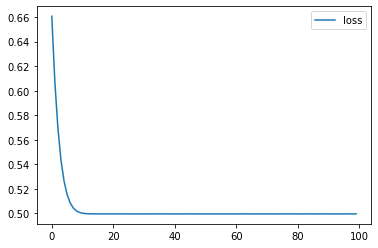

In [26]:
losses.plot()

In [27]:
model.predict(X_test)

TypeError: predict() missing 1 required positional argument: 'x'